## Figure 2.9 Simulation

Here we're comparing the EPE of 1-nearest neighbor to least squares. That is, we're plotting $$\frac{EPE_{1nn}}{EPE_{OLS}}$$

for two seperate cases: 

1. $f(x) = x_1$
2. $f(x) = \frac{1}{2}(x_1 + 1)^3$

We assume an additive error model $Y = f(X) + \epsilon$, where $X \sim U(-1, 1)$ and $\epsilon \sim N(0, 1)$

### Initialize Variables

In [82]:
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
import tqdm
import pandas as pd

sns.set()

N = 500

# number of simulations used to calculate (approximate) EPE
num_simulations = 10000

In [83]:
def fit_predict_clf(clf, X, Y, X0, Y0):
    clf.fit(X, Y)
    return (clf.predict(X0) - Y0)**2

def sim(dim, num_simulations):
    X_0 = np.zeros(dim).reshape(1, -1) # initialize test point of appropriate dimension
    Y_01 = np.random.normal(size=1)
    Y_02 = np.random.normal(size=1) + 0.5

    all_pe_1nn_Y1 = []
    all_pe_linear_Y1 = []
    all_pe_1nn_Y2 = []
    all_pe_linear_Y2 = []

    for _ in range(num_simulations):
        X_shape = (N, dim)
        X = np.random.uniform(low=-1, high=1, size=X_shape)
        epsilon = np.random.normal(size=500)

        Y_01 = np.random.normal(size=1)
        Y_02 = np.random.normal(size=1) + 0.5

        Y_1 = X[:,0] + epsilon
        Y_2 = 0.5 * (X[:, 0] + 1)**3 + epsilon

        clf_linear = LinearRegression()
        clf_1nn = KNeighborsRegressor(n_neighbors=1)

        pe_1nn_Y1 =  fit_predict_clf(clf_1nn, X, Y_1, X_0, Y_01)
        pe_linear_Y1 = fit_predict_clf(clf_linear, X, Y_1, X_0, Y_01)

        pe_1nn_Y2 =  fit_predict_clf(clf_1nn, X, Y_2, X_0, Y_02)
        pe_linear_Y2 = fit_predict_clf(clf_linear, X, Y_2, X_0, Y_02)

        all_pe_1nn_Y1.append(pe_1nn_Y1)
        all_pe_linear_Y1.append(pe_linear_Y1)

        all_pe_1nn_Y2.append(pe_1nn_Y2)
        all_pe_linear_Y2.append(pe_linear_Y2)


    # print(f'dim: {dim}')
    # print(f'EPE 1nn Y1: {np.mean(all_pe_1nn_Y1)}')
    # print(f'EPE OLS Y1: {np.mean(all_pe_linear_Y1)}')
    
    return np.mean(all_pe_1nn_Y1) / np.mean(all_pe_linear_Y1), np.mean(all_pe_1nn_Y2) / np.mean(all_pe_linear_Y2)

In [84]:
epe_linear = []
epe_nonlinear = []

for dim in tqdm.trange(1, 10):
    epe_linear_ratio, epe_nonlinear_ratio = sim(dim, num_simulations)
    epe_linear.append(epe_linear_ratio)
    epe_nonlinear.append(epe_nonlinear_ratio)

100%|██████████| 9/9 [07:25<00:00, 49.48s/it]


[Text(0.5, 1.0, 'Expected Predictiopn Error of 1NN vs. OLS')]

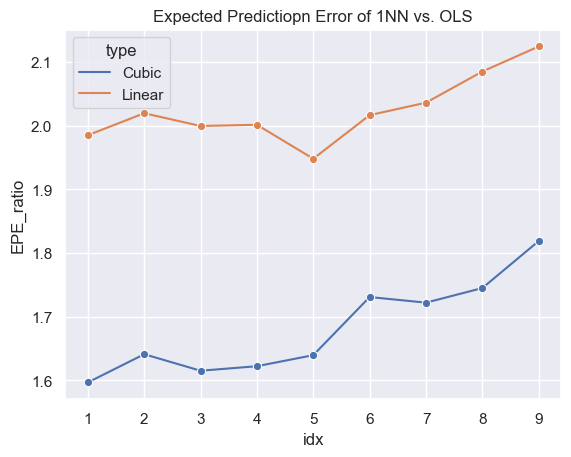

In [85]:
cubic_df = pd.DataFrame({'EPE_ratio': epe_nonlinear, 'type': 'Cubic', 'idx': range(1, 10)})
linear_df = pd.DataFrame({'EPE_ratio': epe_linear, 'type': 'Linear', 'idx': range(1, 10)})
df = pd.concat([cubic_df, linear_df])
sns.lineplot(x='idx', y='EPE_ratio', hue='type', data=df, marker="o").set(title="Expected Predictiopn Error of 1NN vs. OLS")